In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

In [2]:
df = pd.ExcelFile('/Users/carterdemars/Library/CloudStorage/OneDrive-UniversityofWaterloo/2B/SYDE252/Audio Trials.xlsx')

In [3]:
metadata = pd.read_excel(df, 'trial_metadata')
metadata.dropna(axis=1, how='all', inplace=True)
metadata.dropna(axis=0, how='any', inplace=True)
metadata.columns = metadata.iloc[0]
ans = metadata['Trial Number'].apply(lambda x: str(x).isnumeric())
metadata.drop(ans[ans == False].index, inplace=True)
metadata.reset_index(drop=True, inplace=True)

In [4]:
trials = []

for i in range(1,11):
    trial = pd.read_excel(df, f'trial_{i}')
    trial.dropna(axis=1, how='all', inplace=True)
    trial.dropna(axis=0, how='any', inplace=True)
    trial.columns = trial.iloc[0]
    ans = trial['Audio Sample Number'].apply(lambda x: str(x).isnumeric())
    trial.drop(ans[ans == False].index, inplace=True)
    trial.reset_index(inplace=True, drop=True)
    trial = trial.groupby('Audio Sample Number').mean()
    trial['Total Score'] = trial.sum(axis=1)

    trials.append(trial)

In [5]:
metadata

1,Trial Number,Band Spacing,Subbands Overlapping,Filter Type,Cutoff Frequency for Envelope Detection (Hz),Number of Channels
0,1,Logarithmic,No,Butterworth,400,10
1,2,Logarithmic,No,Butterworth,400,4
2,3,Logarithmic,No,Butterworth,400,20
3,4,Logarithmic,No,Butterworth,200,20
4,5,Logarithmic,No,Butterworth,600,20
5,6,Logarithmic,No,Chebychev,400,20
6,7,Logarithmic,Yes,Butterworth,400,20
7,8,Linear,No,Butterworth,400,20
8,9,Logarithmic,No,Butterworth,400,40
9,10,Logarithmic,No,Butterworth,400,30


In [6]:
trials[0]

1,Background Noise,Dynamic Output,Amplitude Accuracy,Pitch Accuracy,Intelligibility,Output Complexity,Total Score
Audio Sample Number,,,,,,,
1,4.0,3.75,3.75,2.5,3.625,3.875,21.5
2,1.5,1.5,2.25,1.25,1.0,1.5,9.0
3,2.5,1.5,2.75,1.75,1.5,2.5,12.5
4,2.25,2.5,3.0,2.25,4.0,3.0,17.0
5,2.375,2.75,3.0,1.5,4.25,3.0,16.875
6,1.75,2.0,2.5,2.0,1.75,2.0,12.0
7,2.75,2.75,4.25,2.5,4.0,3.25,19.5
8,1.25,1.75,1.375,1.25,1.0,1.5,8.125
9,1.25,1.25,1.75,1.5,1.125,1.75,8.625


<BarContainer object of 10 artists>

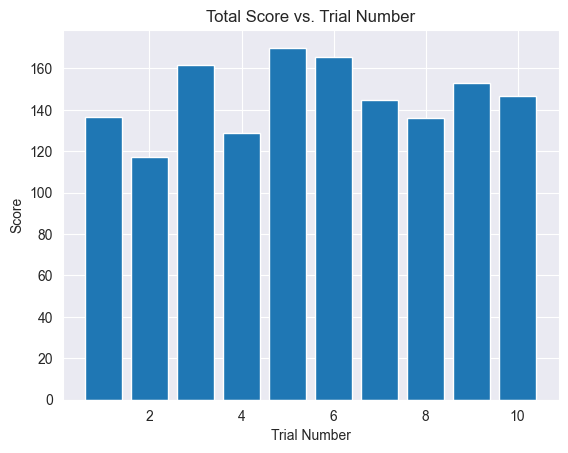

In [23]:
plt.title('Total Score vs. Trial Number')
plt.ylabel('Score')
plt.xlabel('Trial Number')
plt.bar(metadata['Trial Number'], [trial['Total Score'].sum() for trial in trials])

The best trail is #5, which used a 600Hz cutoff frequency, and 20 channels. The worst trial used only 4 channels.

In [14]:
trials[4]

170.0

In [15]:
metadata

1,Trial Number,Band Spacing,Subbands Overlapping,Filter Type,Cutoff Frequency for Envelope Detection (Hz),Number of Channels
0,1,Logarithmic,No,Butterworth,400,10
1,2,Logarithmic,No,Butterworth,400,4
2,3,Logarithmic,No,Butterworth,400,20
3,4,Logarithmic,No,Butterworth,200,20
4,5,Logarithmic,No,Butterworth,600,20
5,6,Logarithmic,No,Chebychev,400,20
6,7,Logarithmic,Yes,Butterworth,400,20
7,8,Linear,No,Butterworth,400,20
8,9,Logarithmic,No,Butterworth,400,40
9,10,Logarithmic,No,Butterworth,400,30


The score generally increases as

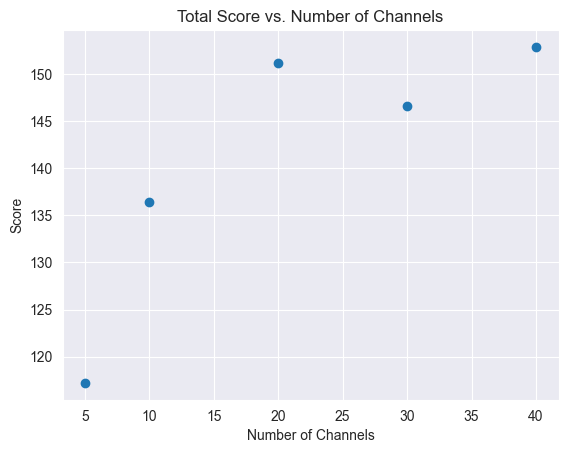

In [67]:
plt.title('Total Score vs. Number of Channels')
plt.ylabel('Score')
plt.xlabel('Number of Channels')
chan = [5,10,20,30,40]
scores = pd.DataFrame([trial['Total Score'].sum() for trial in trials])
scores = pd.concat([scores, metadata['Number of Channels']], axis=1)
scores = scores.groupby('Number of Channels').mean()
plt.scatter(chan, scores)

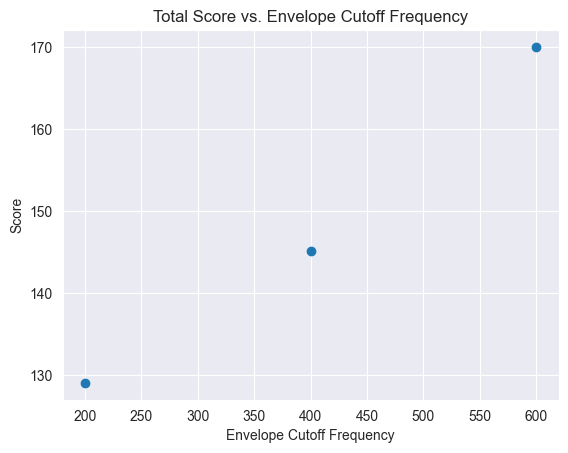

In [66]:
plt.title('Total Score vs. Envelope Cutoff Frequency')
plt.ylabel('Score')
plt.xlabel('Envelope Cutoff Frequency')
freq = [200, 400, 600]
scores = pd.DataFrame([trial['Total Score'].sum() for trial in trials])
scores = pd.concat([scores, metadata['Cutoff Frequency for Envelope Detection (Hz)']], axis=1)
scores = scores.groupby('Cutoff Frequency for Envelope Detection (Hz)').mean()
plt.scatter(freq, scores)

In [ ]:
plt.title('Total Score vs. Envelope Cutoff Frequency')
plt.ylabel('Score')
plt.xlabel('Envelope Cutoff Frequency')
freq = [200, 400, 600]
scores = pd.DataFrame([trial['Total Score'].sum() for trial in trials])
scores = pd.concat([scores, metadata['Cutoff Frequency for Envelope Detection (Hz)']], axis=1)
scores = scores.groupby('Cutoff Frequency for Envelope Detection (Hz)').mean()
plt.scatter(freq, scores)